In [5]:
# Import packages
import laspy
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import ndarray
from laspy import LasData
from sklearn.cluster import KMeans
from datetime import datetime

In [7]:
# Constants
SOURCE_FILEPATH = "./data/dane.las"

In [ ]:
# Create test data

NEW_FILENAME = "new_test_file"

# 0. Creating some dummy data
my_data_xx, my_data_yy = np.meshgrid(np.linspace(-20, 20, 15), np.linspace(-20, 20, 15))
my_data_zz = my_data_xx ** 2 + 0.25 * my_data_yy ** 2
my_data = np.hstack((my_data_xx.reshape((-1, 1)), my_data_yy.reshape((-1, 1)), my_data_zz.reshape((-1, 1))))

# 1. Create a new header
header = laspy.LasHeader(point_format=3, version="1.2")
header.add_extra_dim(laspy.ExtraBytesParams(name="random", type=np.int32))
header.offsets = np.min(my_data, axis=0)
header.scales = np.array([0.1, 0.1, 0.1])

# 2. Create a Las
las = laspy.LasData(header)

las.x = my_data[:, 0]
las.y = my_data[:, 1]
las.z = my_data[:, 2]
las.random = np.random.randint(-1503, 6546, len(las.points), np.int32)

las.write(f"./data/{NEW_FILENAME}.las")


In [12]:
# Read las file
def read_las(filepath) -> LasData:
    las_data = laspy.read(filepath)
    return las_data

# Prepare las data
def prepare_data(las: LasData, dimensions: list) -> ndarray:
    data = None
    if len(dimensions) == 1:
        data = np.array(las[dimensions[0]])
    elif len(dimensions) > 1:        
        attributes_array = [las[dim] for dim in dimensions]    
        data = np.stack(attributes_array, -1)        
    return data



In [11]:
# Get dimension names
def get_dimension_names(las: LasData):
    return list(las.point_format.dimension_names)


las = read_las(SOURCE_FILEPATH)
get_dimension_names(las)


['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

In [6]:
# Displaying chart method

def display_chart(x: list, y: list, title: str, x_label_name: str, y_label_name: str, save: bool = False):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    save if plt.savefig(f"{title} {str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))}") else do_nothing()
    plt.show()


def do_nothing():
    pass

Cluster: 3
Cluster: 4


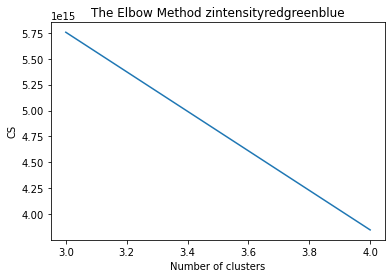

In [13]:
# Testing optimal dimensions in kmeans approach

def elbow_method(las_filepath: str, attributes: list, min_clusters: int, max_clusters: int, step: int) -> None:
    las = read_las(las_filepath)
    data = prepare_data(las, attributes)

    cs = []

    for i in range(min_clusters, max_clusters + 1, step):
        print(f"Cluster: {i}")
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init="auto", random_state=0)
        kmeans.fit(data)
        cs.append(kmeans.inertia_)

    display_chart(x=list(range(min_clusters, max_clusters + 1, step)), y=cs,
                  title=f"The Elbow Method {''.join(attributes)}",
                  x_label_name="Number of clusters", y_label_name="CS", save=True)



attributes = ["z", "intensity", "red", "green", "blue"]
elbow_method(SOURCE_FILEPATH, attributes, 3, 4, 1)
